# Auto-ML 03 with pycaret

In [1]:
# %reset -f
import pandas as pd
from functionsAll import originalToRecurring, recurringToOrignal
from sklearn.preprocessing import StandardScaler 
import pycaret
from pycaret.regression import *

functionsAll.py loaded successfully


In [2]:
df = pd.read_csv("../Data/cleanned/zusammen.csv", parse_dates=["date"])
df['dayofyear'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['weekday'] = df['date'].dt.weekday
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.week
df.drop(columns=['date','rohwert'], inplace= True)
# Conclude with 11 features, 1 label.
df = df[[ 'wert', 'day', 'month', 'dayofyear', 'year', 'weekday', 'week', 'hour','temp', 'dwpt', 'rhum', 'prcp']]
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [3]:
cyDf = df[['day','month','dayofyear','weekday', 'week', 'hour']] # [32,13,367,7,54,52]
scDf = df[['wert','year' , 'temp', 'dwpt', 'rhum', 'prcp']]

In [6]:
day = cyDf['day']
day.to_numpy()
day = originalToRecurring(ogUnits=day,period=32)
cyDf['day_sin'] = day[:,0]
cyDf['day_cos'] = day[:,1]

month = cyDf['month']
month.to_numpy()
month = originalToRecurring(ogUnits=month,period=13)
cyDf['month_sin'] = month[:,0]
cyDf['month_cos'] = month[:,1]

dayofyear = cyDf['dayofyear']
dayofyear.to_numpy()
dayofyear = originalToRecurring(ogUnits=dayofyear,period=367)
cyDf['dayofyear_sin'] = dayofyear[:,0]
cyDf['dayofyear_cos'] = dayofyear[:,1]

weekday = cyDf['weekday']
weekday.to_numpy()
weekday = originalToRecurring(ogUnits=weekday,period=7)
cyDf['weekday_sin'] = weekday[:,0]
cyDf['weekday_cos'] = weekday[:,1]

week = cyDf['week']
week.to_numpy()
week = originalToRecurring(ogUnits=week,period=54)
cyDf['week_sin'] = week[:,0]
cyDf['week_cos'] = week[:,1]

hour = cyDf['hour']
hour.to_numpy()
hour = originalToRecurring(ogUnits=hour,period=25)
cyDf['hour_sin'] = hour[:,0]
cyDf['hour_cos'] = hour[:,1]

In [7]:
cyDf.drop(['day', 'month', 'dayofyear', 'weekday', 'week','hour'], axis=1, inplace=True)

In [10]:
scaler = StandardScaler()
scaler = scaler.fit(scDf)
scaledDf = scaler.transform(scDf)

In [11]:
cyDf['wert'] = scaledDf[:,0]
cyDf['year'] = scaledDf[:,1]
cyDf['temp'] = scaledDf[:,2]
cyDf['dwpt'] = scaledDf[:,3]
cyDf['rhum'] = scaledDf[:,4]
cyDf['prcp'] = scaledDf[:,5]
mainDf = cyDf[['wert','day_sin', 'day_cos', 'month_sin', 'month_cos', 'dayofyear_sin',
        'dayofyear_cos', 'weekday_sin', 'weekday_cos', 'week_sin', 'week_cos',
        'hour_sin', 'hour_cos', 'temp', 'dwpt', 'rhum', 'prcp']]

In [12]:
mainDf.head(5)

,wert,day_sin,day_cos,month_sin,month_cos,dayofyear_sin,dayofyear_cos,weekday_sin,weekday_cos,week_sin,week_cos,hour_sin,hour_cos,temp,dwpt,rhum,prcp
0,1.680347,0.382683,0.92388,0.464723,0.885456,0.034234,0.999414,0.433884,-0.900969,0.116093,0.993238,0.000000,1.000000,-1.566281,-1.385630,0.792786,-0.154285
1,1.188967,0.382683,0.92388,0.464723,0.885456,0.034234,0.999414,0.433884,-0.900969,0.116093,0.993238,0.982287,-0.187381,-1.691633,-1.490882,0.903869,-0.154285
2,1.287243,0.382683,0.92388,0.464723,0.885456,0.034234,0.999414,0.433884,-0.900969,0.116093,0.993238,0.998027,0.062791,-1.747346,-1.508424,1.014952,-0.154285
3,0.795863,0.382683,0.92388,0.464723,0.885456,0.034234,0.999414,0.433884,-0.900969,0.116093,0.993238,0.951057,0.309017,-1.775202,-1.490882,1.126034,-0.154285
4,1.876899,0.382683,0.92388,0.464723,0.885456,0.034234,0.999414,0.433884,-0.900969,0.116093,0.993238,0.844328,0.535827,-1.761274,-1.420714,1.237117,-0.154285


In [13]:
s = setup(mainDf, target = 'wert', session_id = 123)

,Description,Value
0,session_id,123
1,Target,wert
2,Original Data,"(23736, 17)"
3,Missing Values,False
4,Numeric Features,16
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(16615, 14)"


In [14]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3726,0.3172,0.5623,0.6812,0.2565,1.9538,0.1850
rf,Random Forest Regressor,0.4303,0.3995,0.6314,0.5989,0.2889,2.0100,0.2610
knn,K Neighbors Regressor,0.4726,0.5003,0.7064,0.4969,0.3025,2.4150,0.0830
lightgbm,Light Gradient Boosting Machine,0.5258,0.5534,0.7433,0.4444,0.3409,2.0542,166.5250
gbr,Gradient Boosting Regressor,0.6085,0.7306,0.8543,0.2667,0.3898,1.9797,0.2210
dt,Decision Tree Regressor,0.5562,0.8026,0.8955,0.1934,0.3254,3.3129,0.0200
br,Bayesian Ridge,0.6857,0.9176,0.9573,0.0797,0.4323,1.8945,0.2520
ridge,Ridge Regression,0.6856,0.9177,0.9573,0.0796,0.4315,1.9052,0.2520
lar,Least Angle Regression,0.6856,0.9177,0.9573,0.0796,0.4315,1.9054,0.2560
lr,Linear Regression,0.6856,0.9177,0.9573,0.0796,0.4315,1.9054,1.9880


In [15]:
s.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.3709,0.3119,0.5585,0.6902,0.2530,1.9504


,day_sin,day_cos,month_sin,month_cos,dayofyear_sin,weekday_sin,weekday_cos,week_cos,hour_sin,hour_cos,temp,dwpt,rhum,prcp,wert,Label
0,9.238795e-01,-0.382683,-0.822984,0.568065,-0.777236,0.781832,0.623490,0.597159,-0.844328,0.535827,0.105089,0.596614,0.626162,-0.154285,3.252763,2.267055
1,1.224647e-16,-1.000000,0.992709,0.120537,0.959163,0.974928,-0.222521,0.286803,0.587785,-0.809017,-0.020264,-0.438363,-0.762371,-0.154285,0.501035,-0.575087
2,9.238795e-01,0.382683,0.992709,0.120537,0.904389,-0.433884,-0.900969,0.396080,0.481754,0.876307,-1.023085,-0.578699,1.070493,-0.154285,-0.776552,-0.840432
3,7.071068e-01,0.707107,0.663123,-0.748511,0.851408,0.781832,0.623490,-0.500000,0.770513,-0.637424,-0.257041,-0.034897,0.292914,-0.154285,1.778623,1.001260
4,-7.071068e-01,-0.707107,-0.822984,0.568065,-0.658675,-0.433884,-0.900969,0.686242,-0.951057,0.309017,-1.287719,-1.104958,0.681703,-0.154285,0.795863,0.877432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7116,1.950903e-01,0.980785,0.935016,-0.354605,0.999918,-0.433884,-0.900969,0.058145,-0.125333,-0.992115,-1.468784,-1.525966,0.292914,-0.154285,-0.874828,-0.780484
7117,-3.826834e-01,-0.923880,-0.935016,-0.354605,-0.974381,-0.433884,-0.900969,-0.286803,0.481754,0.876307,-0.089904,-0.526073,-0.762371,-0.154285,-0.874828,-0.602604
7118,5.555702e-01,-0.831470,-0.822984,0.568065,-0.743908,-0.433884,-0.900969,0.597159,-0.684547,0.728969,0.160801,0.824660,0.903869,-0.154285,1.188967,0.590466
7119,-5.555702e-01,0.831470,-0.663123,-0.748511,-0.832953,0.000000,1.000000,-0.597159,0.982287,-0.187381,0.369723,0.491363,-0.095875,-0.154285,-0.285173,-0.242914


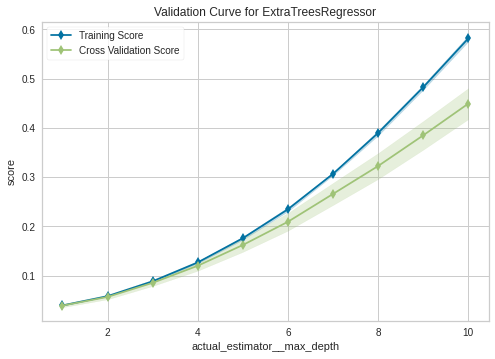

In [16]:
plot_model(best, plot = 'vc')

In [1]:
plot_model(best, plot = 'feature')

NameError: name 'plot_model' is not defined